<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/US_stock_market_prediction/blob/ml-avijeet/Optiver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
# Create the directory for kaggle.json
!mkdir -p ~/.kaggle

# Move the uploaded file to the Kaggle directory
!mv kaggle.json ~/.kaggle/

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle competitions download -c 'optiver-trading-at-the-close'
! unzip optiver-trading-at-the-close.zip
! rm -rf optiver-trading-at-the-close.zip

 99% 199M/201M [00:05<00:00, 42.6MB/s]
100% 201M/201M [00:06<00:00, 34.9MB/s]
Archive:  optiver-trading-at-the-close.zip
  inflating: example_test_files/revealed_targets.csv  
  inflating: example_test_files/sample_submission.csv  
  inflating: example_test_files/test.csv  
  inflating: optiver2023/__init__.py  
  inflating: optiver2023/competition.cpython-310-x86_64-linux-gnu.so  
  inflating: public_timeseries_testing_util.py  
  inflating: train.csv               


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette('viridis')

In [6]:
train=  pd.read_csv('train.csv')
train = train[train['stock_id']==142]

In [7]:
train['far_price'] = train['far_price'].fillna(train['far_price'].mean())
train['near_price'] = train['near_price'].fillna(train['near_price'].mean())

In [8]:
train['imbalance_buy_flag'] = (train['imbalance_buy_sell_flag'] == 1).astype(int)
train['imbalance_sell_flag'] = (train['imbalance_buy_sell_flag'] == -1).astype(int)
train['no_imbalance'] = (train['imbalance_buy_sell_flag'] == 0).astype(int)


In [9]:
desc = pd.DataFrame(index = list(train))
desc['count'] = train.count()
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] / len(train) * 100
desc['null'] = train.isnull().sum()
desc['type'] = train.dtypes
desc = pd.concat([desc, train.describe().T], axis = 1)
desc

,count,nunique,%unique,null,type,count,mean,std,min,25%,50%,75%,max
stock_id,26455,1,0.003780,0,int64,26455.0,1.420000e+02,0.000000e+00,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02
date_id,26455,481,1.818182,0,int64,26455.0,2.400000e+02,1.388551e+02,0.000000e+00,1.200000e+02,2.400000e+02,3.600000e+02,4.800000e+02
seconds_in_bucket,26455,55,0.207900,0,int64,26455.0,2.700000e+02,1.587481e+02,0.000000e+00,1.300000e+02,2.700000e+02,4.100000e+02,5.400000e+02
imbalance_size,26455,22249,84.101304,0,float64,26455.0,2.159371e+07,3.357177e+07,0.000000e+00,3.754001e+06,1.206009e+07,2.716184e+07,6.072123e+08
imbalance_buy_sell_flag,26455,3,0.011340,0,int64,26455.0,-1.980722e-02,9.496196e-01,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
reference_price,26455,8115,30.674731,0,float64,26455.0,1.000007e+00,2.511807e-03,9.527130e-01,9.988865e-01,1.000021e+00,1.001192e+00,1.009583e+00
matched_size,26455,20462,77.346437,0,float64,26455.0,1.678931e+08,1.600705e+08,2.083488e+07,8.936611e+07,1.375257e+08,2.002404e+08,2.096903e+09
far_price,26455,4548,17.191457,0,float64,26455.0,1.000247e+00,8.190292e-03,9.452710e-01,1.000247e+00,1.000247e+00,1.000247e+00,1.105518e+00
near_price,26455,6125,23.152523,0,float64,26455.0,1.000050e+00,6.314961e-03,9.485230e-01,1.000050e+00,1.000050e+00,1.000050e+00,1.064146e+00
bid_price,26455,7991,30.206010,0,float64,26455.0,9.998143e-01,2.519713e-03,9.527470e-01,9.987160e-01,9.998350e-01,1.000993e+00,1.009316e+00


In [10]:
temporal_features = ['date_id', 'seconds_in_bucket']
categorical_features = ['imbalance_buy_sell_flag', 'stock_id']
numerical_features = train.drop(temporal_features + categorical_features, axis = 1).columns

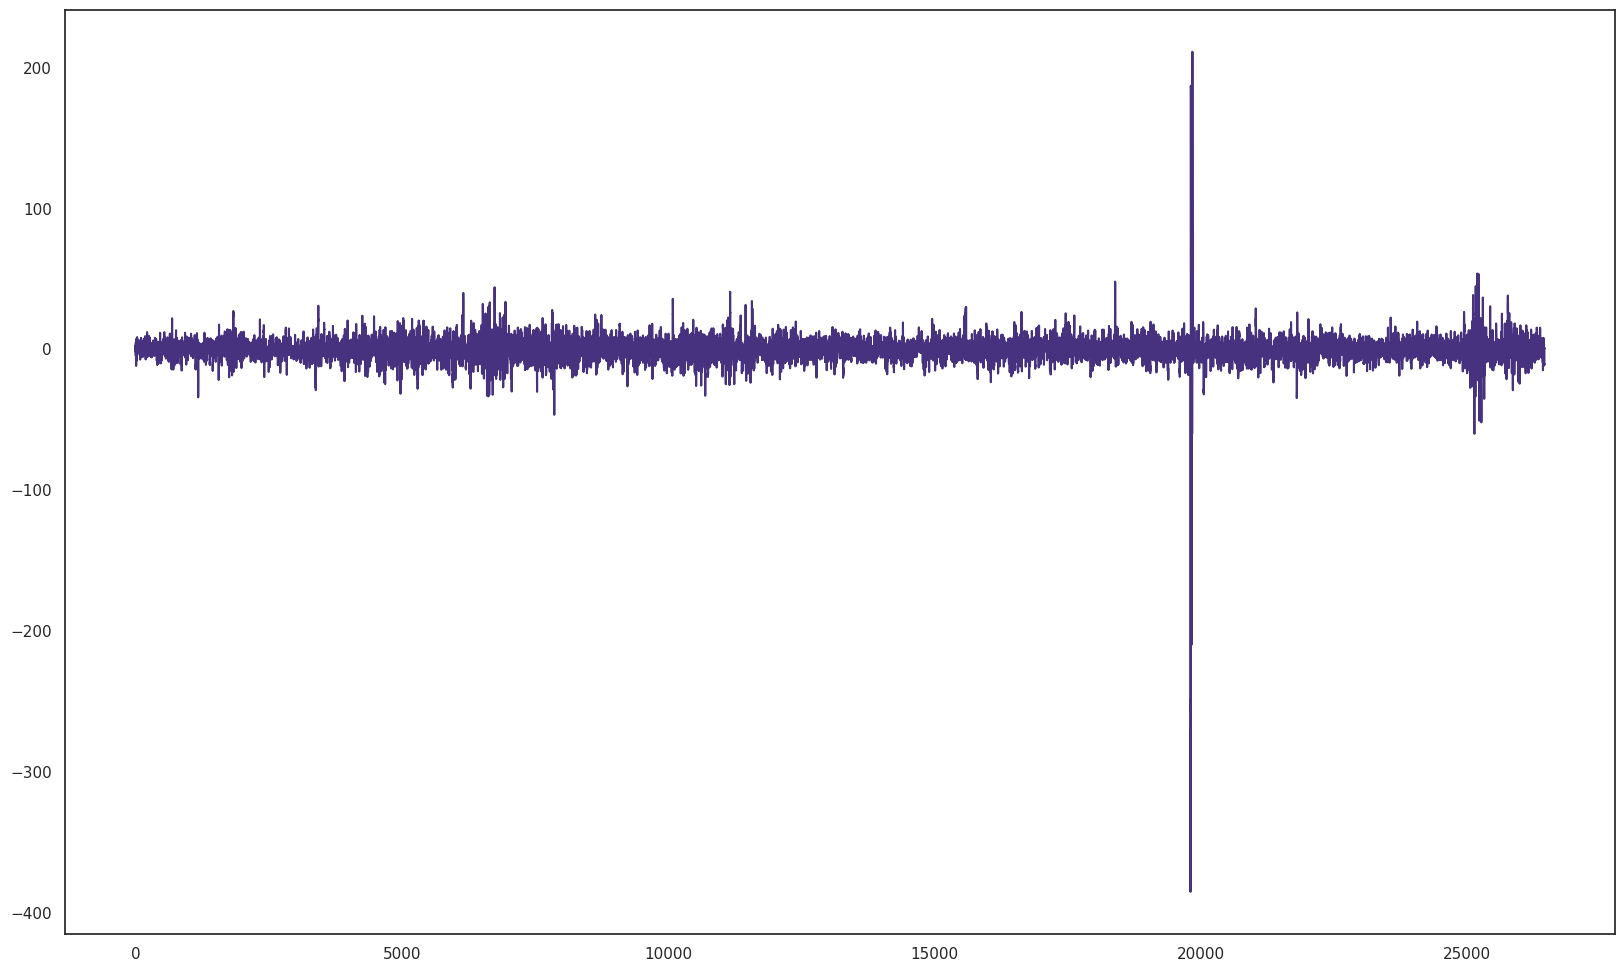

In [11]:
plt.figure(figsize=(20,12))
plt.plot(train['time_id'], train['target'])

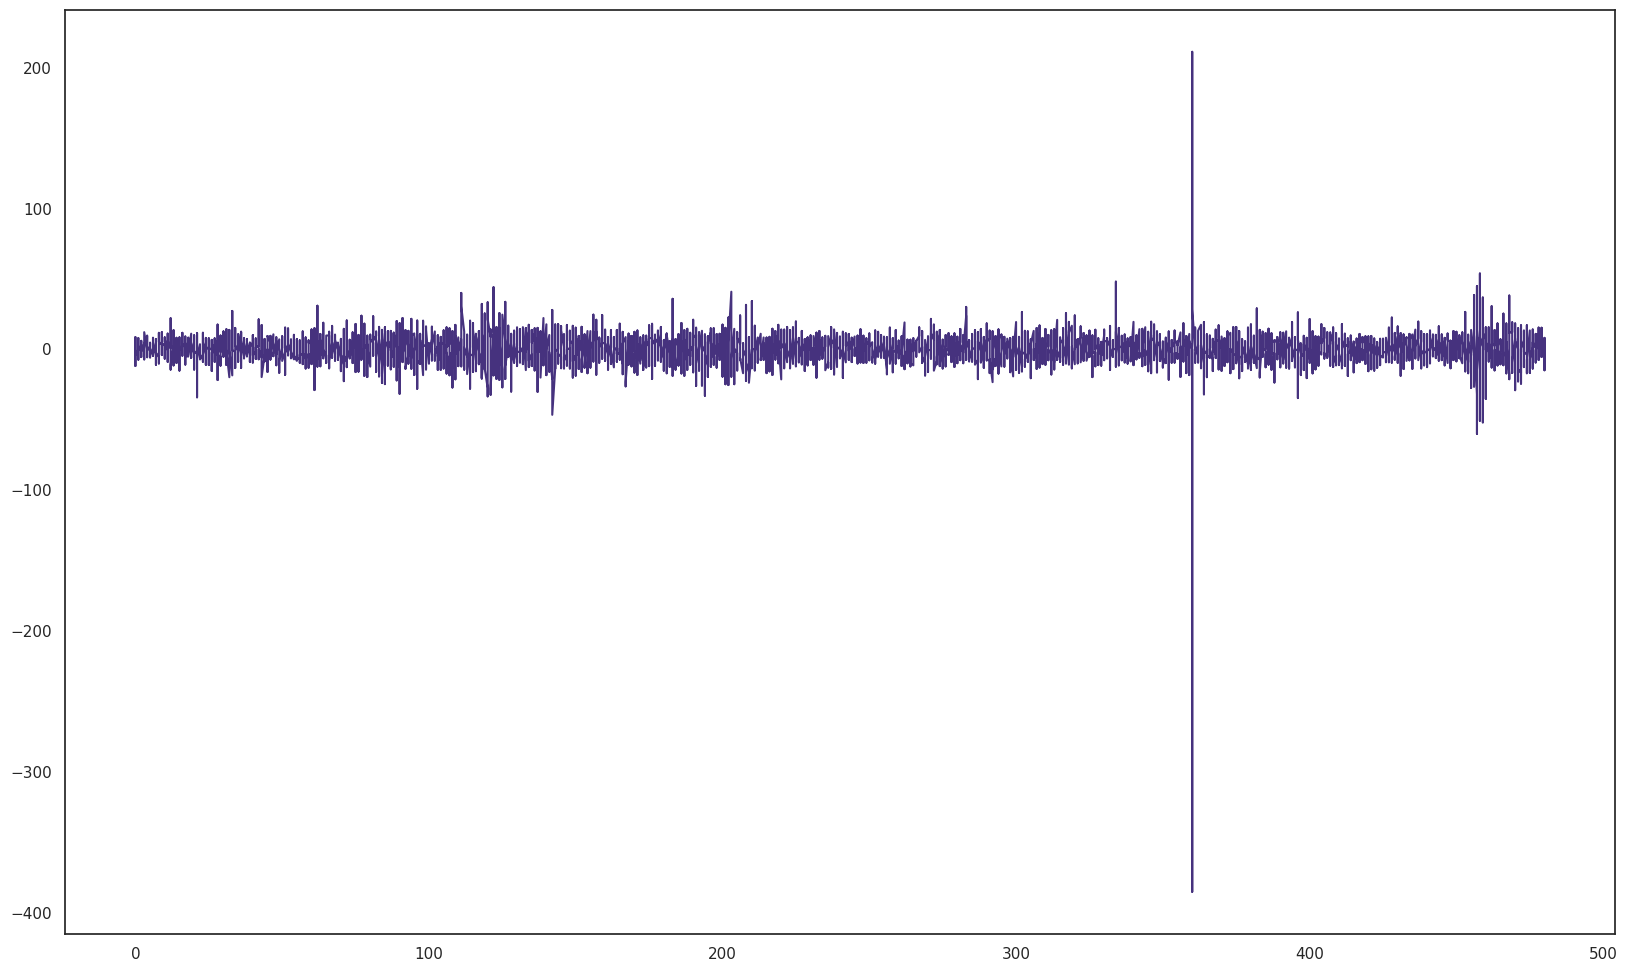

In [12]:
plt.figure(figsize=(20,12))
plt.plot(train['date_id'], train['target'])

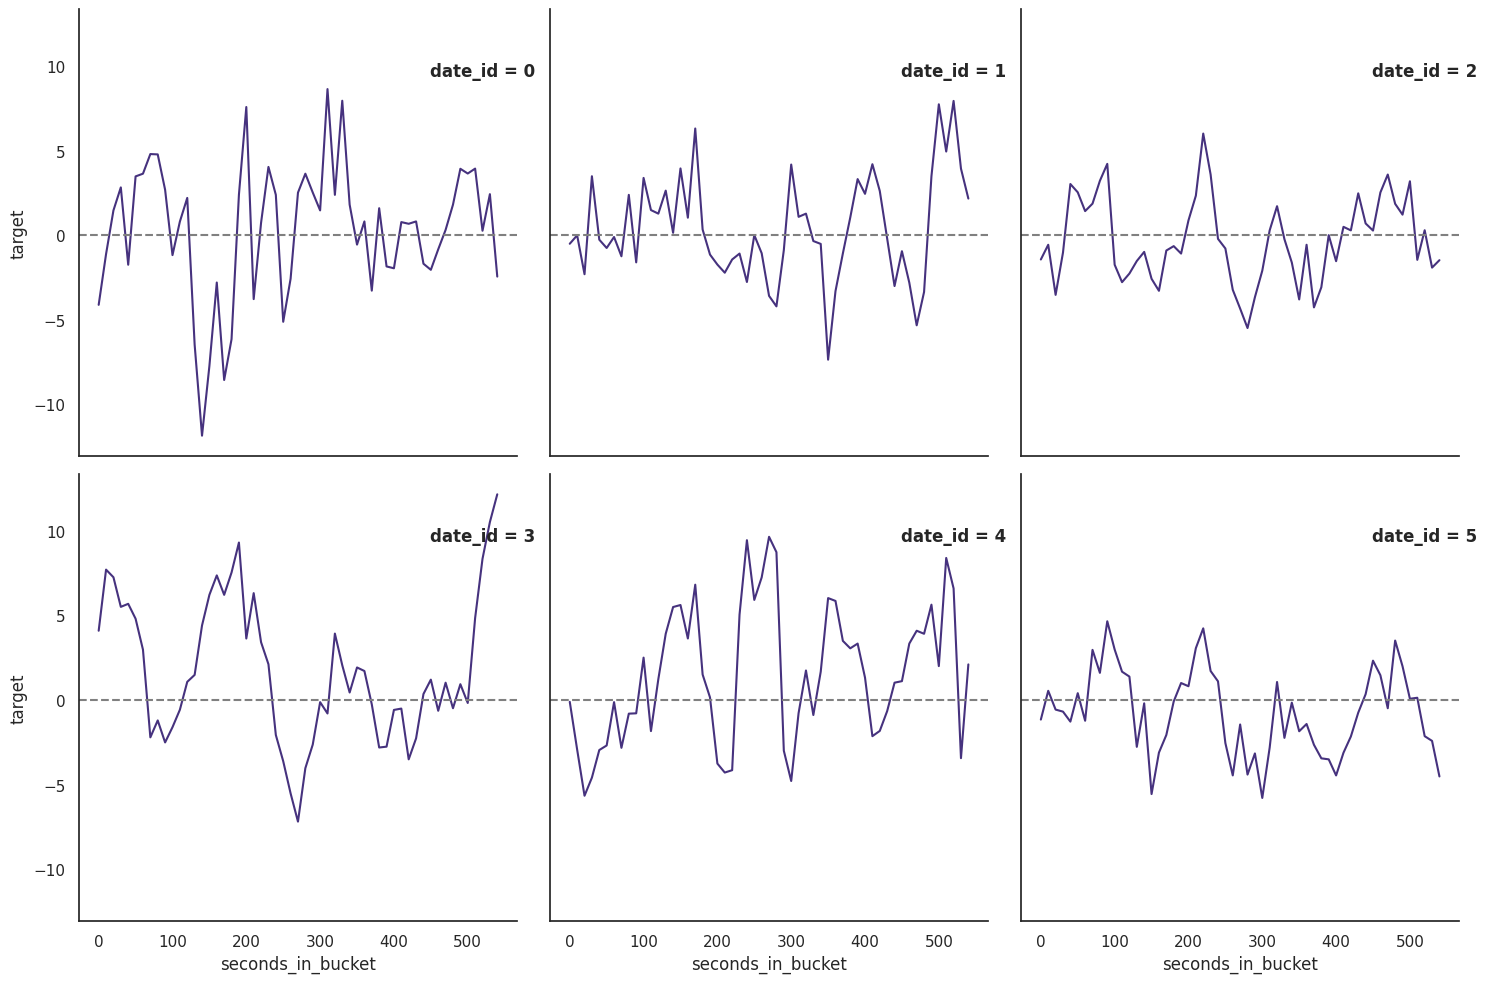

In [13]:
g = sns.relplot(
    data=train.query(" date_id < 6"),
    x="seconds_in_bucket",
    y="target",
    kind="line",
    col="date_id",
    col_wrap=3
)
g.refline(y=0)
for date_id, ax in g.axes_dict.items():
    ax.text(.8, .85, f"date_id = {date_id}", transform=ax.transAxes, fontweight="bold")
g.set_titles("")
g.tight_layout()
plt.show()

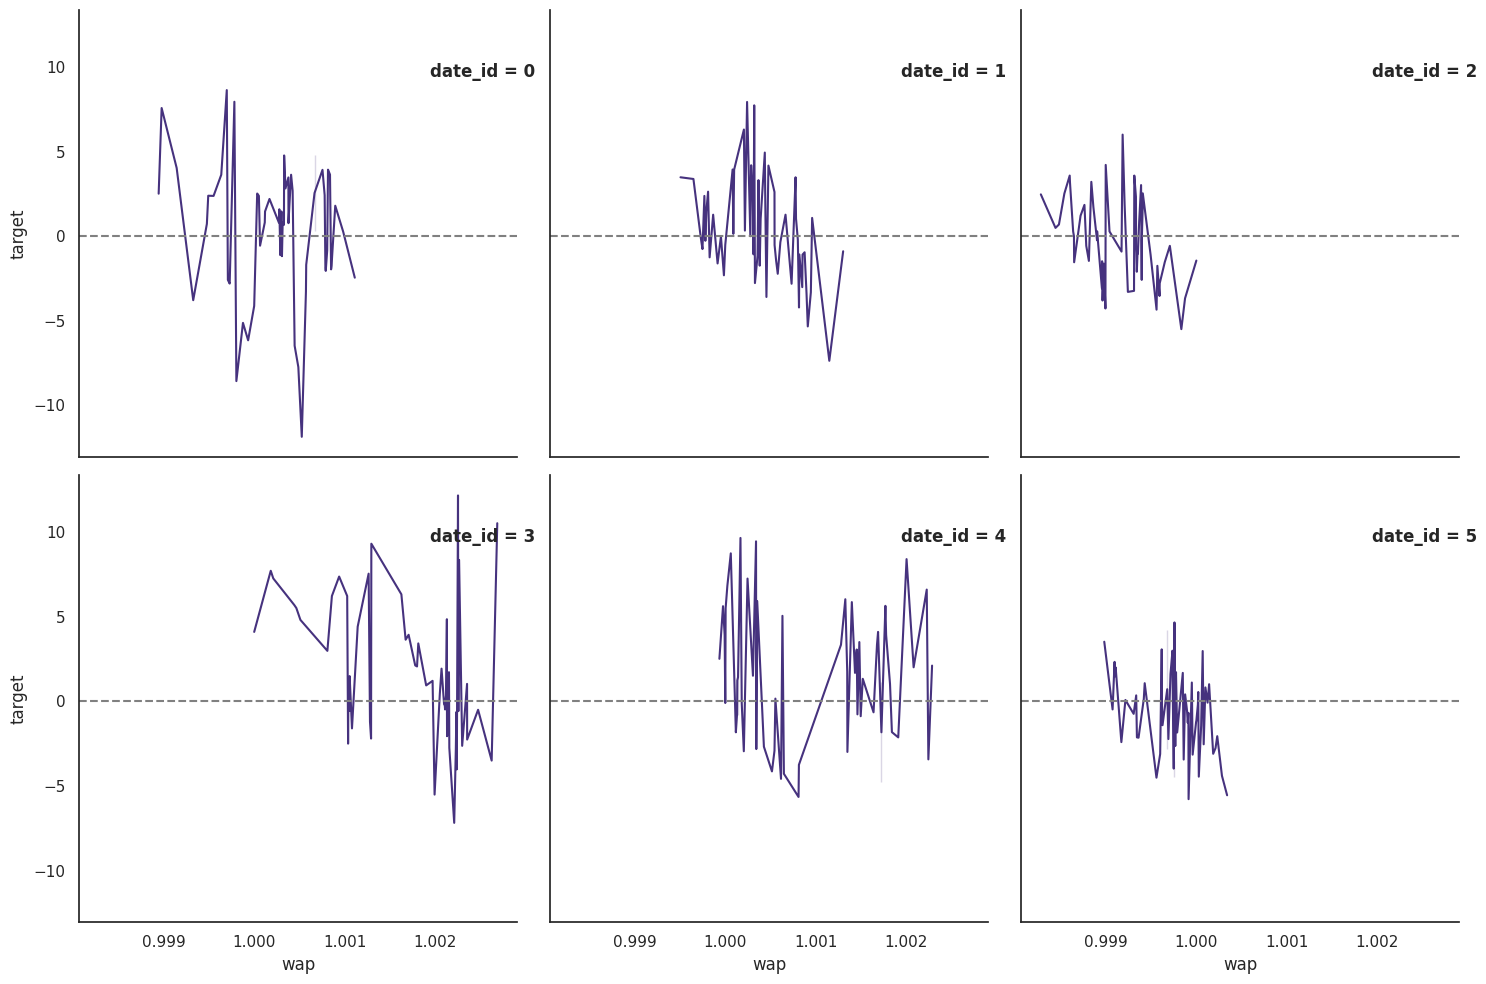

In [14]:
g = sns.relplot(
    data=train.query(" date_id < 6"),
    x="wap",
    y="target",
    kind="line",
    col="date_id",
    col_wrap=3
)
g.refline(y=0)
for date_id, ax in g.axes_dict.items():
    ax.text(.8, .85, f"date_id = {date_id}", transform=ax.transAxes, fontweight="bold")
g.set_titles("")
g.tight_layout()
plt.show()

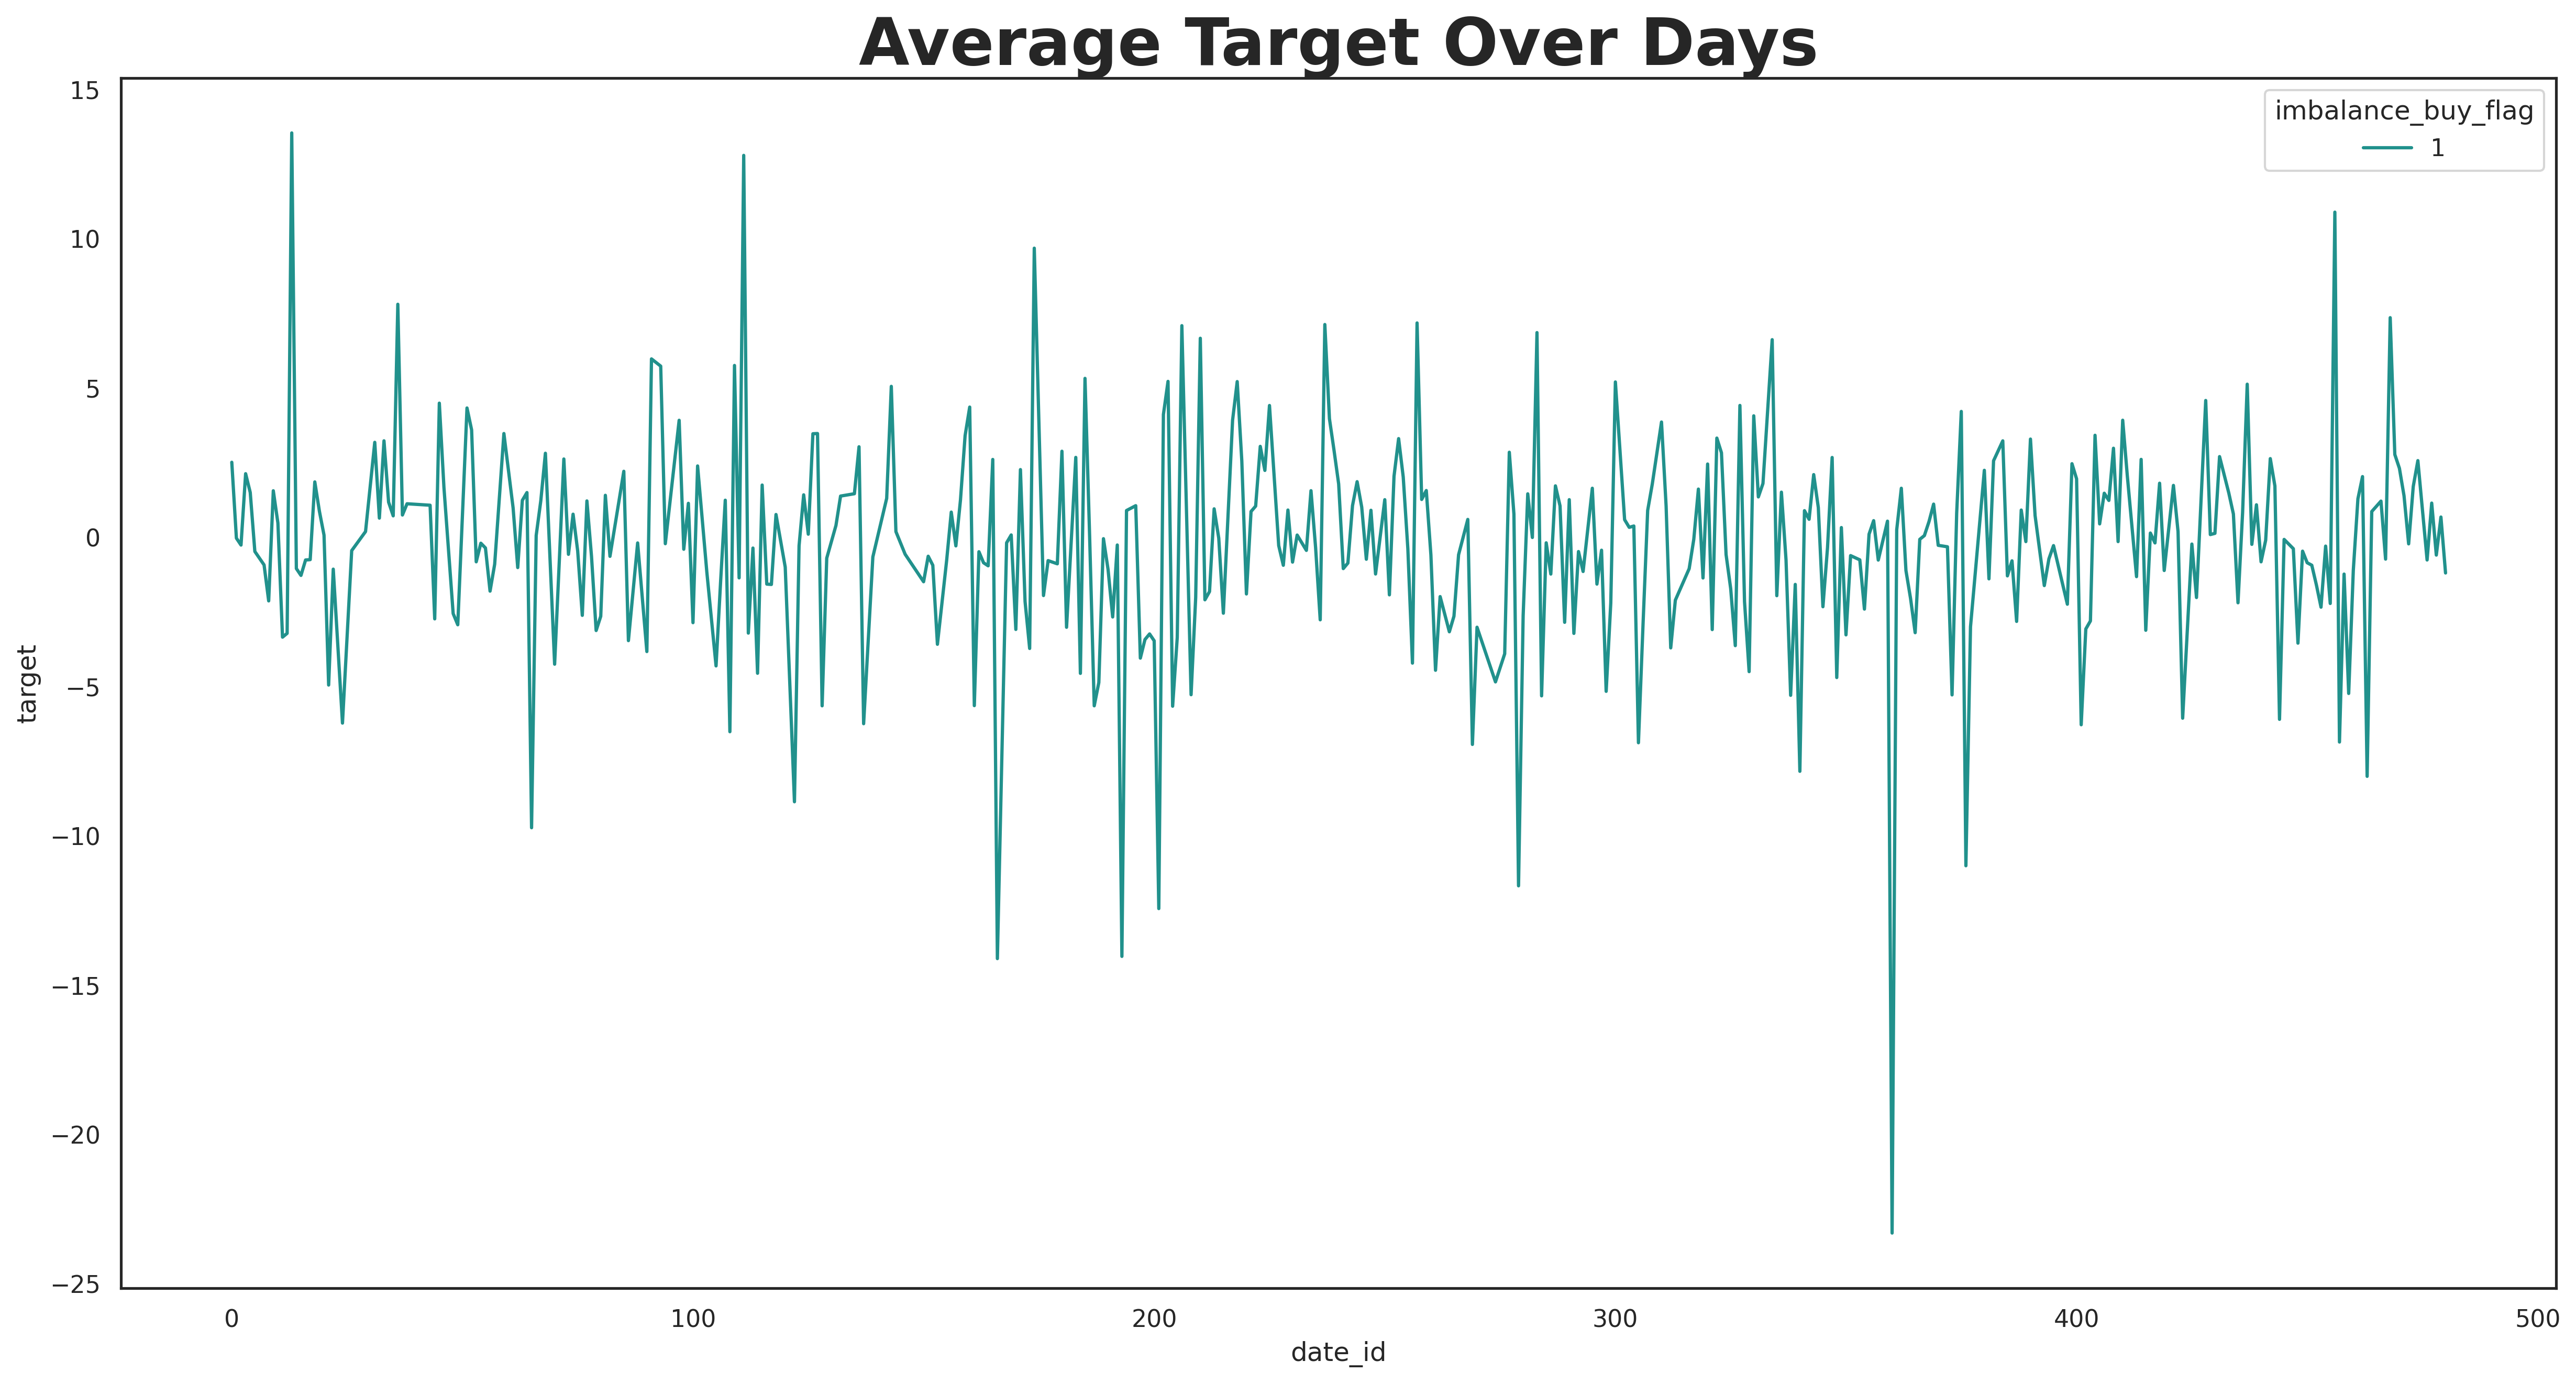

In [15]:
plt.figure(figsize = (20, 10), dpi = 300)

sns.lineplot(data = train[train['imbalance_buy_flag']==1], x = 'date_id', y = 'target', hue = 'imbalance_buy_flag', errorbar = None, palette = 'viridis')

plt.title('Average Target Over Days', weight = 'bold', fontsize = 30)
plt.show()

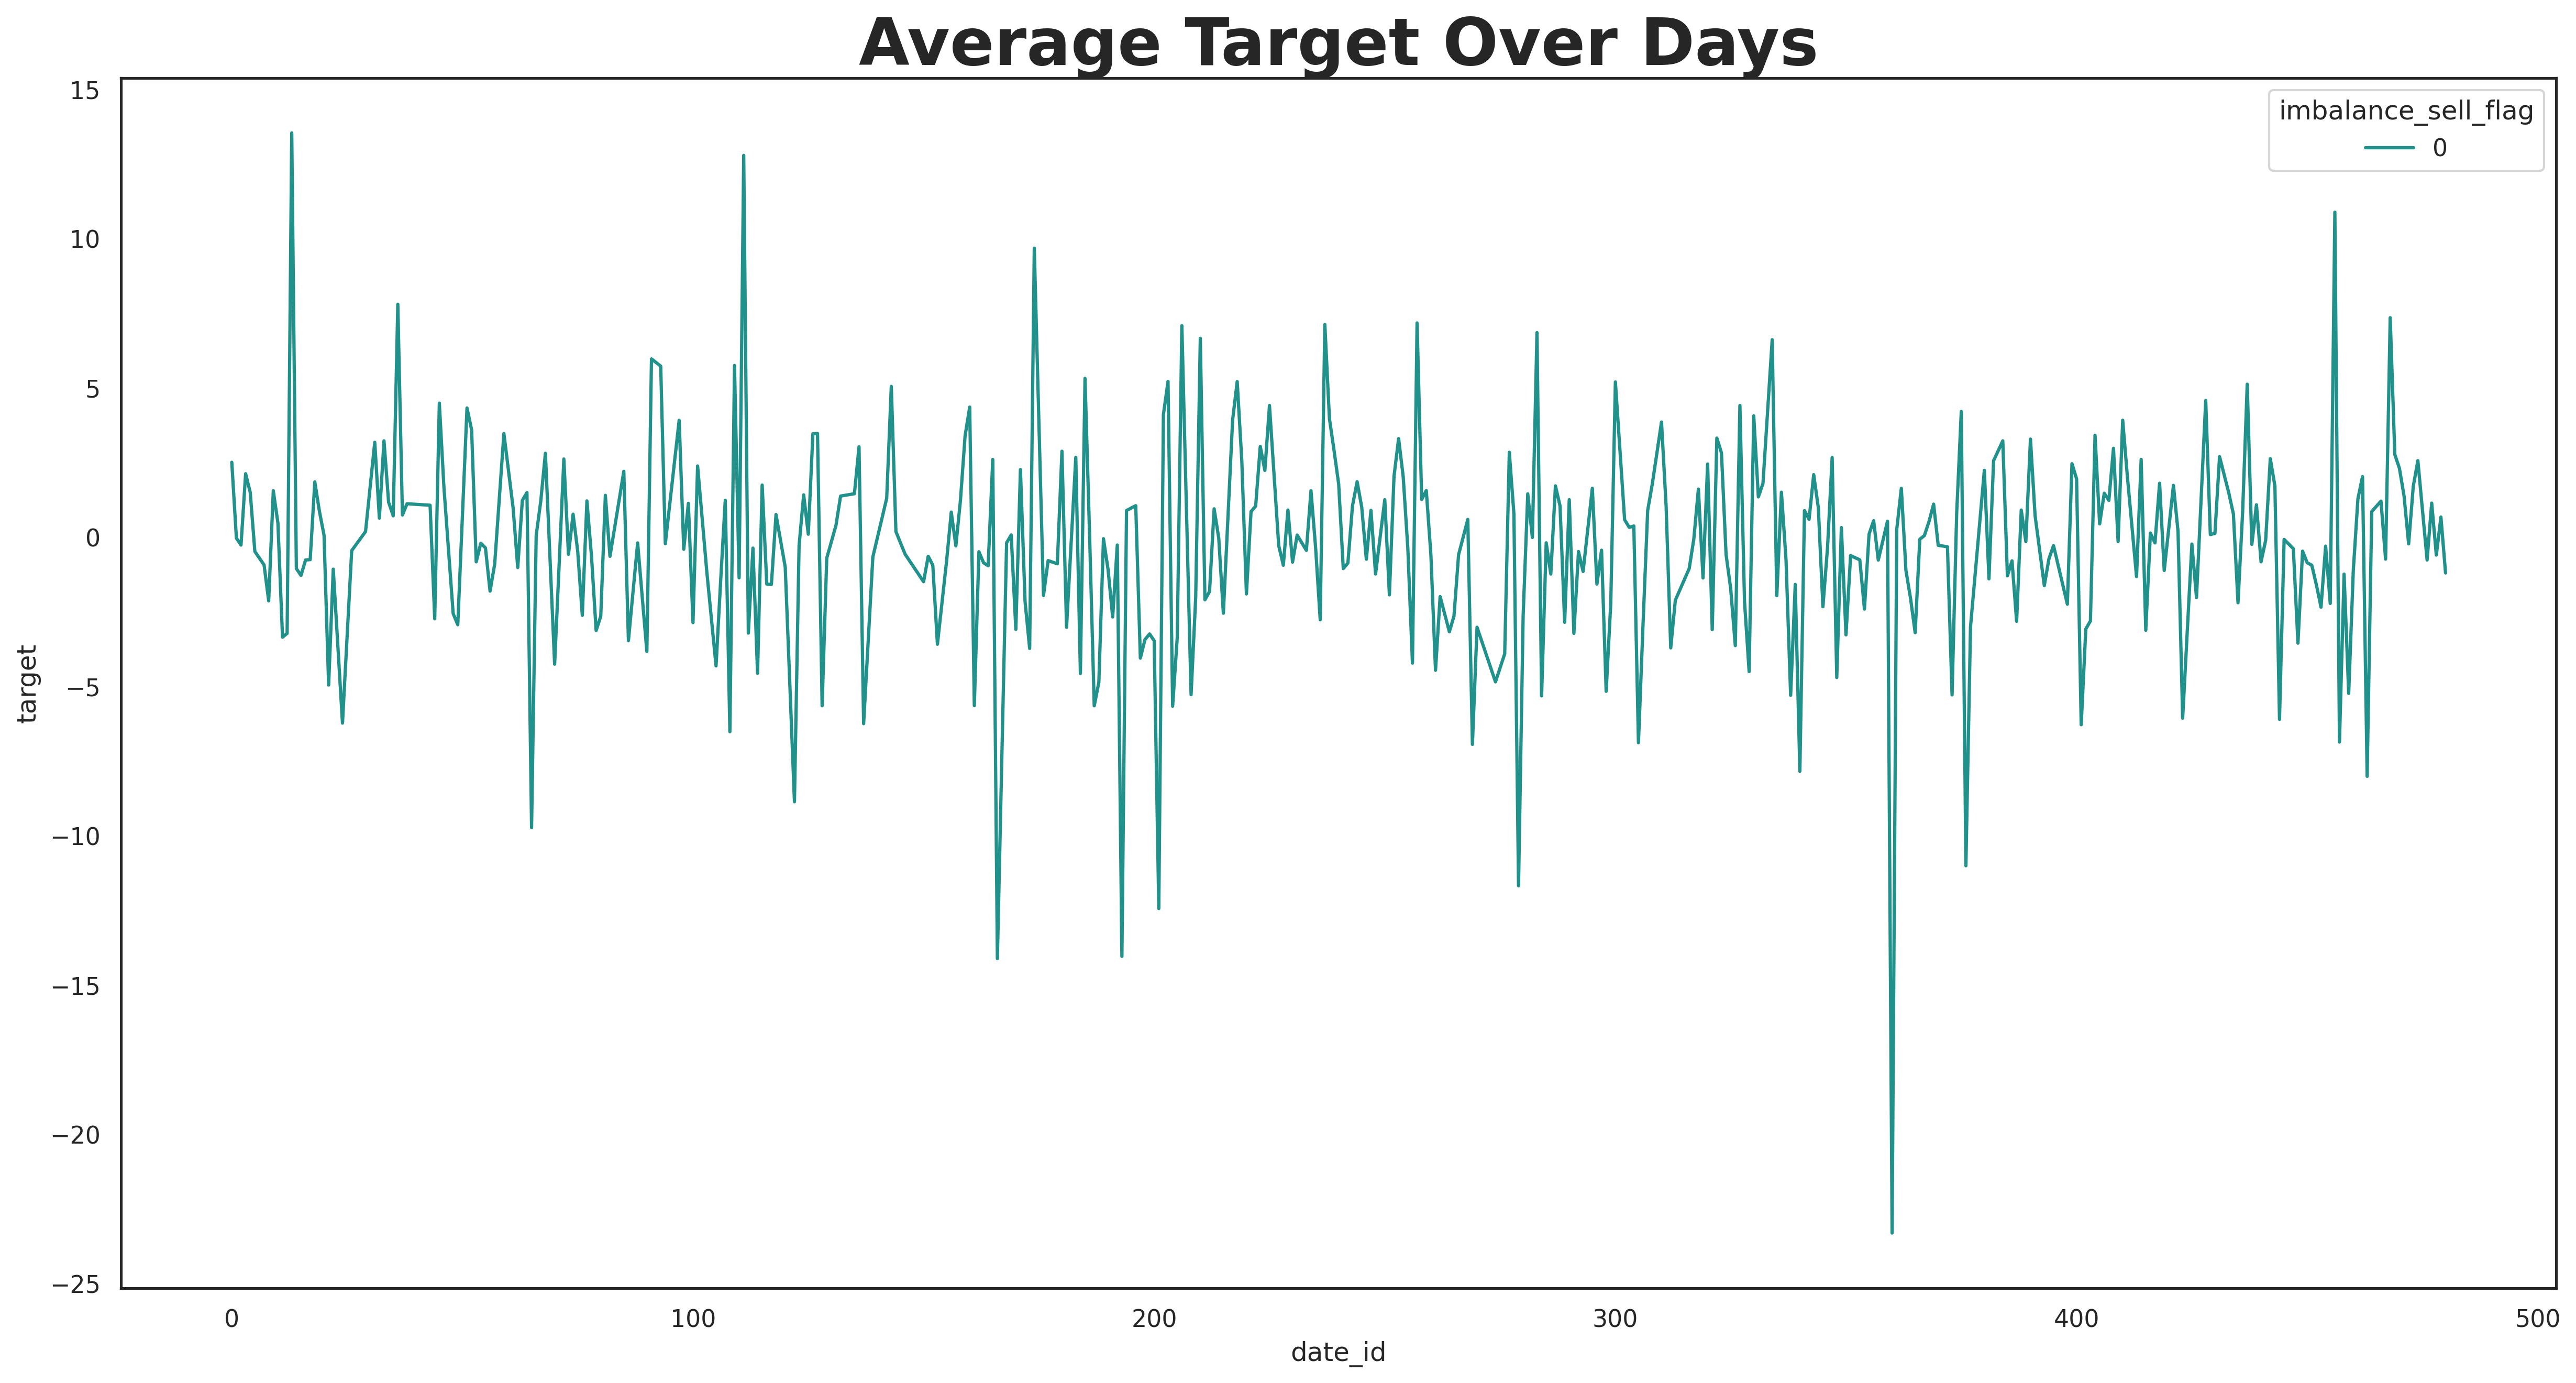

In [16]:
plt.figure(figsize = (20, 10), dpi = 300)

sns.lineplot(data = train[train['imbalance_buy_sell_flag']==1], x = 'date_id', y = 'target', hue = 'imbalance_sell_flag', errorbar = None, palette = 'viridis')

plt.title('Average Target Over Days', weight = 'bold', fontsize = 30)
plt.show()

In [17]:
train[train['imbalance_buy_flag']==0]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,imbalance_buy_flag,imbalance_sell_flag,no_imbalance
137,142,0,0,27645525.02,-1,1.000100,4.212543e+07,1.000247,1.000050,0.999687,17427.96,1.000513,28586.09,1.000000,-4.119873,0,0_0_142,0,1,0
328,142,0,10,25632933.90,-1,1.000265,4.414722e+07,1.000247,1.000050,1.000038,15981.24,1.000327,2422.10,1.000289,-1.119971,1,0_10_142,0,1,0
519,142,0,20,25481844.28,-1,1.000224,4.429831e+07,1.000247,1.000050,1.000203,4359.24,1.000410,4844.60,1.000301,1.460314,2,0_20_142,0,1,0
710,142,0,30,25486202.64,-1,1.000265,4.429395e+07,1.000247,1.000050,1.000245,1937.52,1.000575,4360.86,1.000346,2.820492,3,0_30_142,0,1,0
901,142,0,40,25925427.89,-1,1.000616,4.418015e+07,1.000247,1.000050,1.000513,128879.66,1.000885,11147.87,1.000855,-1.749992,4,0_40_142,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236322,142,480,460,12148853.14,-1,0.998322,1.920407e+08,0.997014,0.997014,0.998079,3451.12,0.998402,345224.00,0.998082,-8.170009,26446,480_460_142,0,1,0
5236522,142,480,470,6575802.32,-1,0.998160,1.974314e+08,0.997442,0.997616,0.998090,61258.09,0.998333,863.00,0.998330,-11.500120,26447,480_470_142,0,1,0
5236722,142,480,480,5785703.29,-1,0.998090,1.981610e+08,0.997616,0.997616,0.998067,6902.16,0.998298,6040.79,0.998190,-9.880066,26448,480_480_142,0,1,0
5236922,142,480,490,5252343.23,-1,0.998067,1.986943e+08,0.997616,0.997616,0.998044,6902.00,0.998241,1725.84,0.998201,-11.249781,26449,480_490_142,0,1,0


In [ ]:
# fig, ax = plt.subplots(5, 2, figsize = (15, 20), dpi = 300)
# ax = ax.flatten()

# for i, column in enumerate(numerical_features):

#     sns.kdeplot(train[column], ax=ax[i], color=pal[0], fill = True)

#     ax[i].set_title(f'{column} Distribution', size = 14)
#     ax[i].set_xlabel(None)

# fig.suptitle('Distribution of Numerical Features\nper Dataset\n', fontsize = 24, fontweight = 'bold')
# plt.tight_layout()

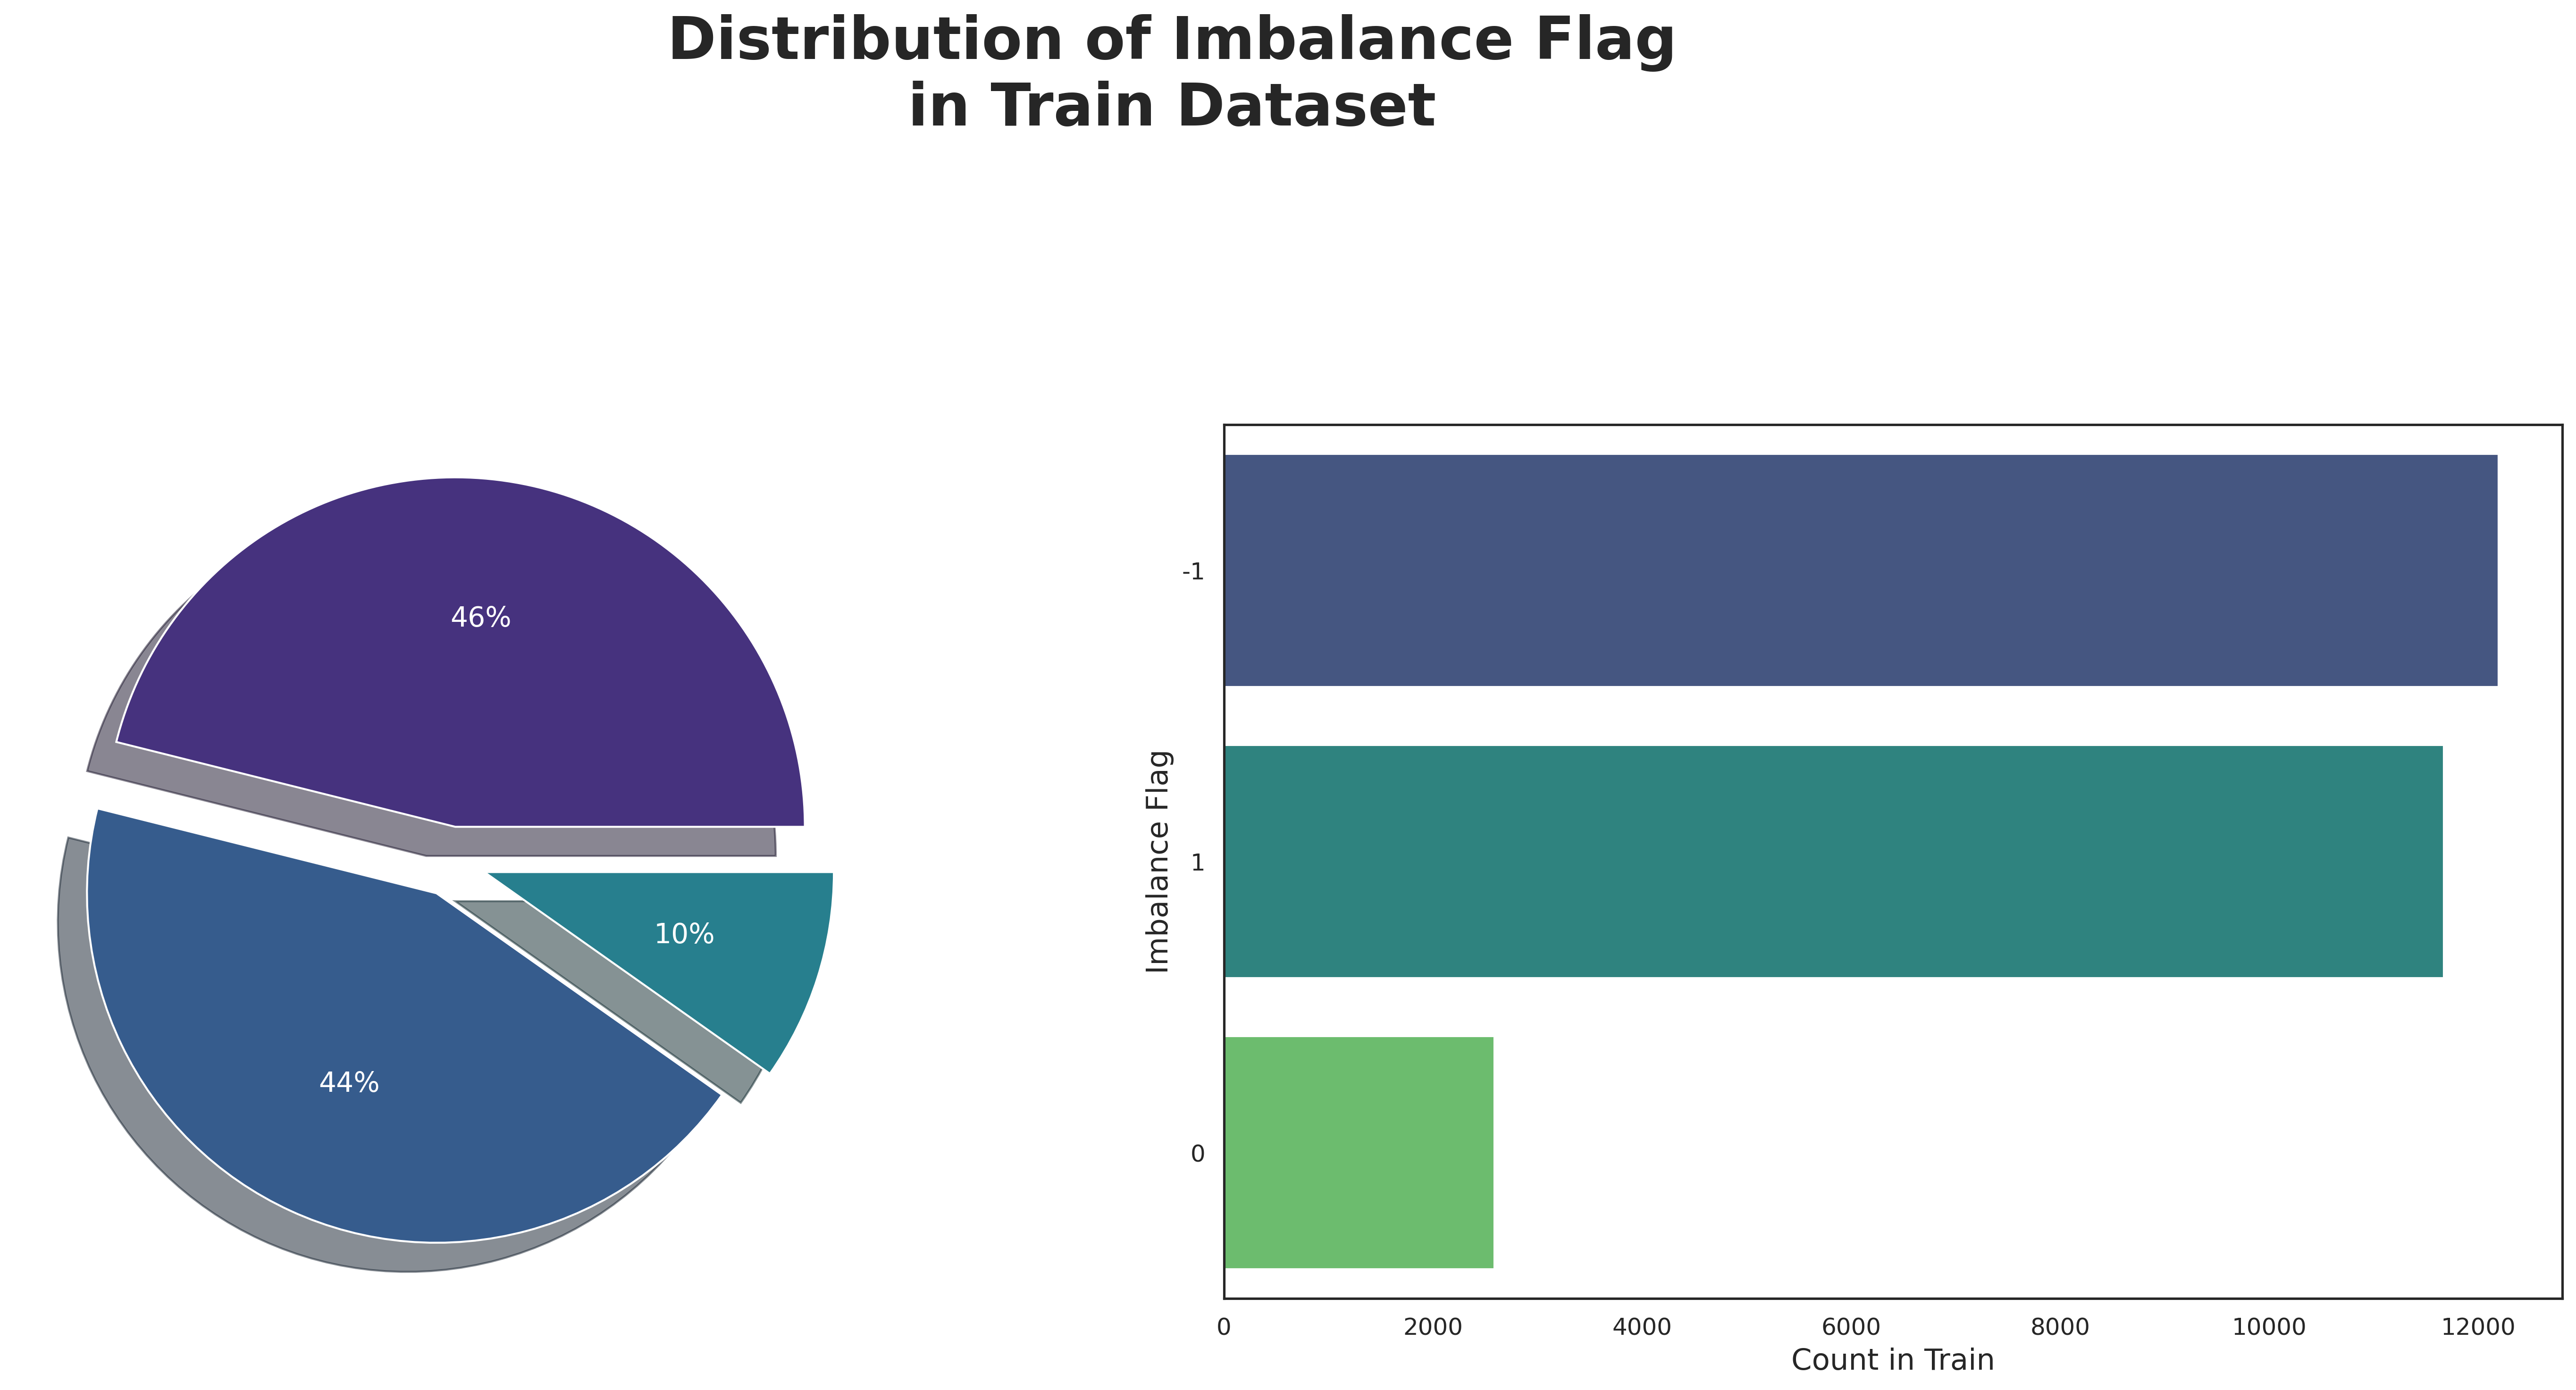

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10), dpi = 300)
ax = ax.flatten()

ax[0].pie(
    train['imbalance_buy_sell_flag'].value_counts(),
    shadow = True,
    explode = [.1 for i in range(train['imbalance_buy_sell_flag'].nunique())],
    autopct = '%1.f%%',
    textprops = {'size' : 14, 'color' : 'white'}
)

sns.countplot(data = train, y = 'imbalance_buy_sell_flag', ax = ax[1], palette = 'viridis', order = train['imbalance_buy_sell_flag'].value_counts().index)
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize = 12)
ax[1].set_xlabel('Count in Train', fontsize = 15)
ax[1].set_ylabel('Imbalance Flag', fontsize = 15)
plt.xticks(fontsize = 12)

fig.suptitle('Distribution of Imbalance Flag\nin Train Dataset\n\n\n\n', fontsize = 30, fontweight = 'bold')
plt.tight_layout()

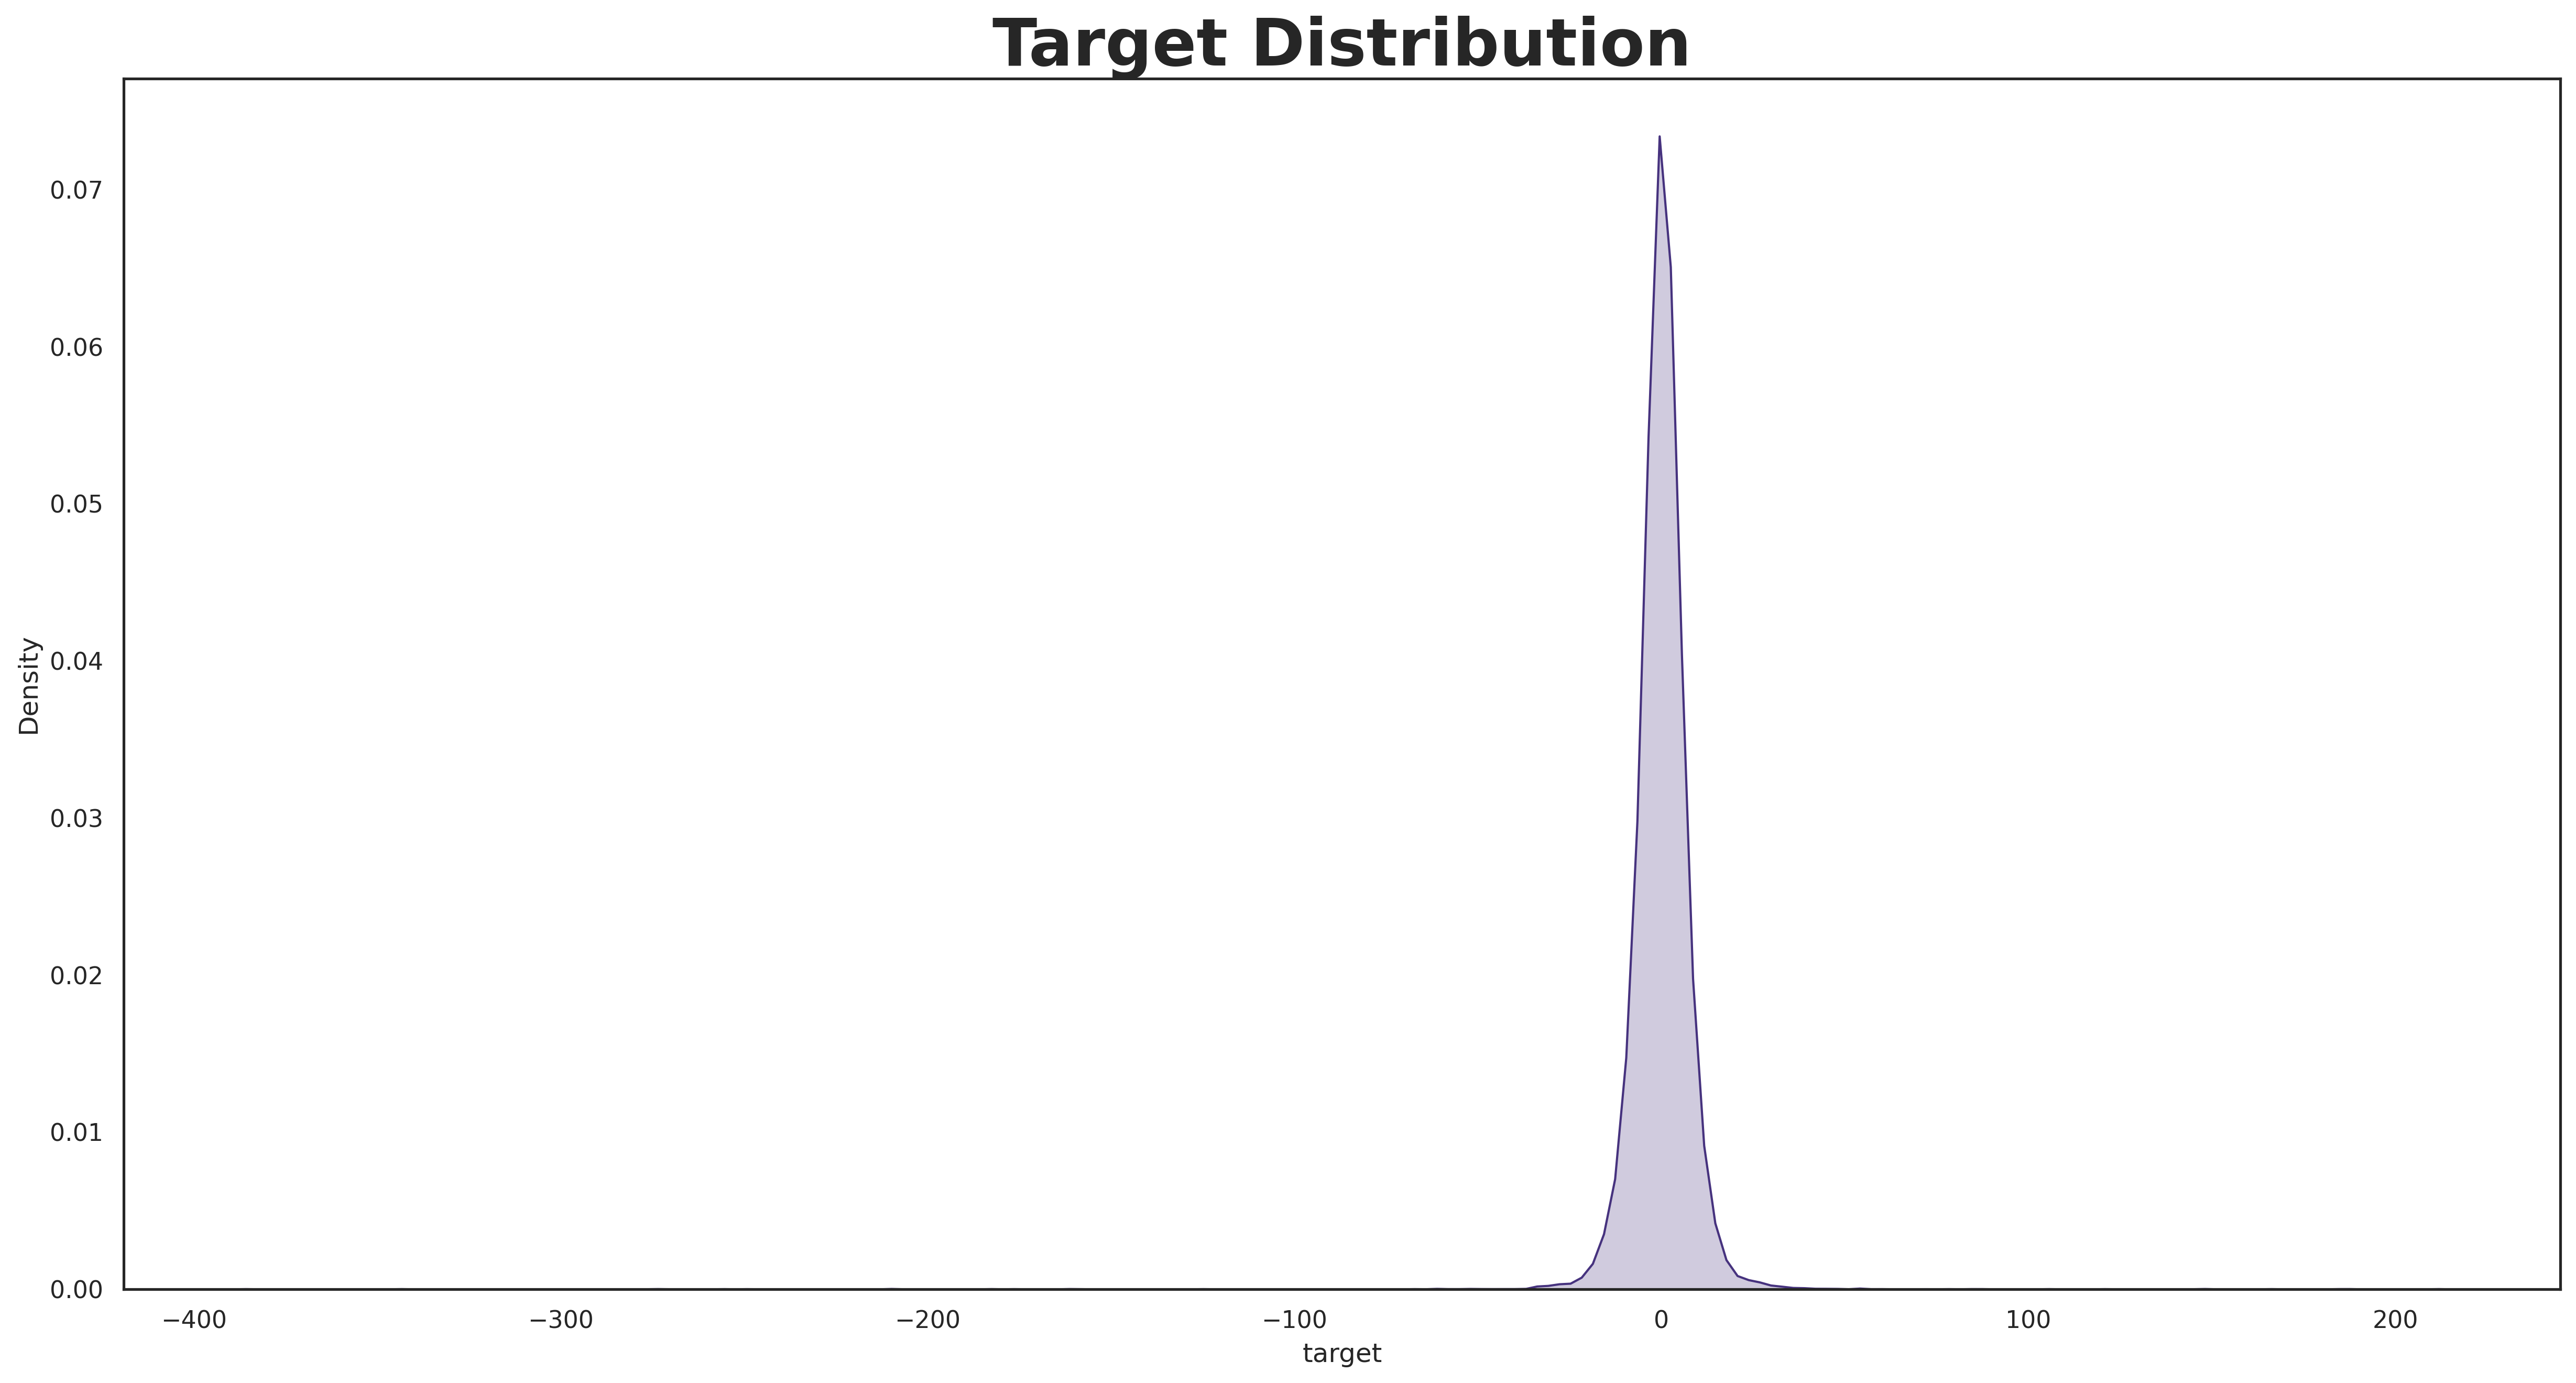

In [19]:
plt.figure(figsize = (20, 10), dpi = 300)

sns.kdeplot(train.target, fill = True)

plt.title('Target Distribution', weight = 'bold', fontsize = 30)
plt.show()

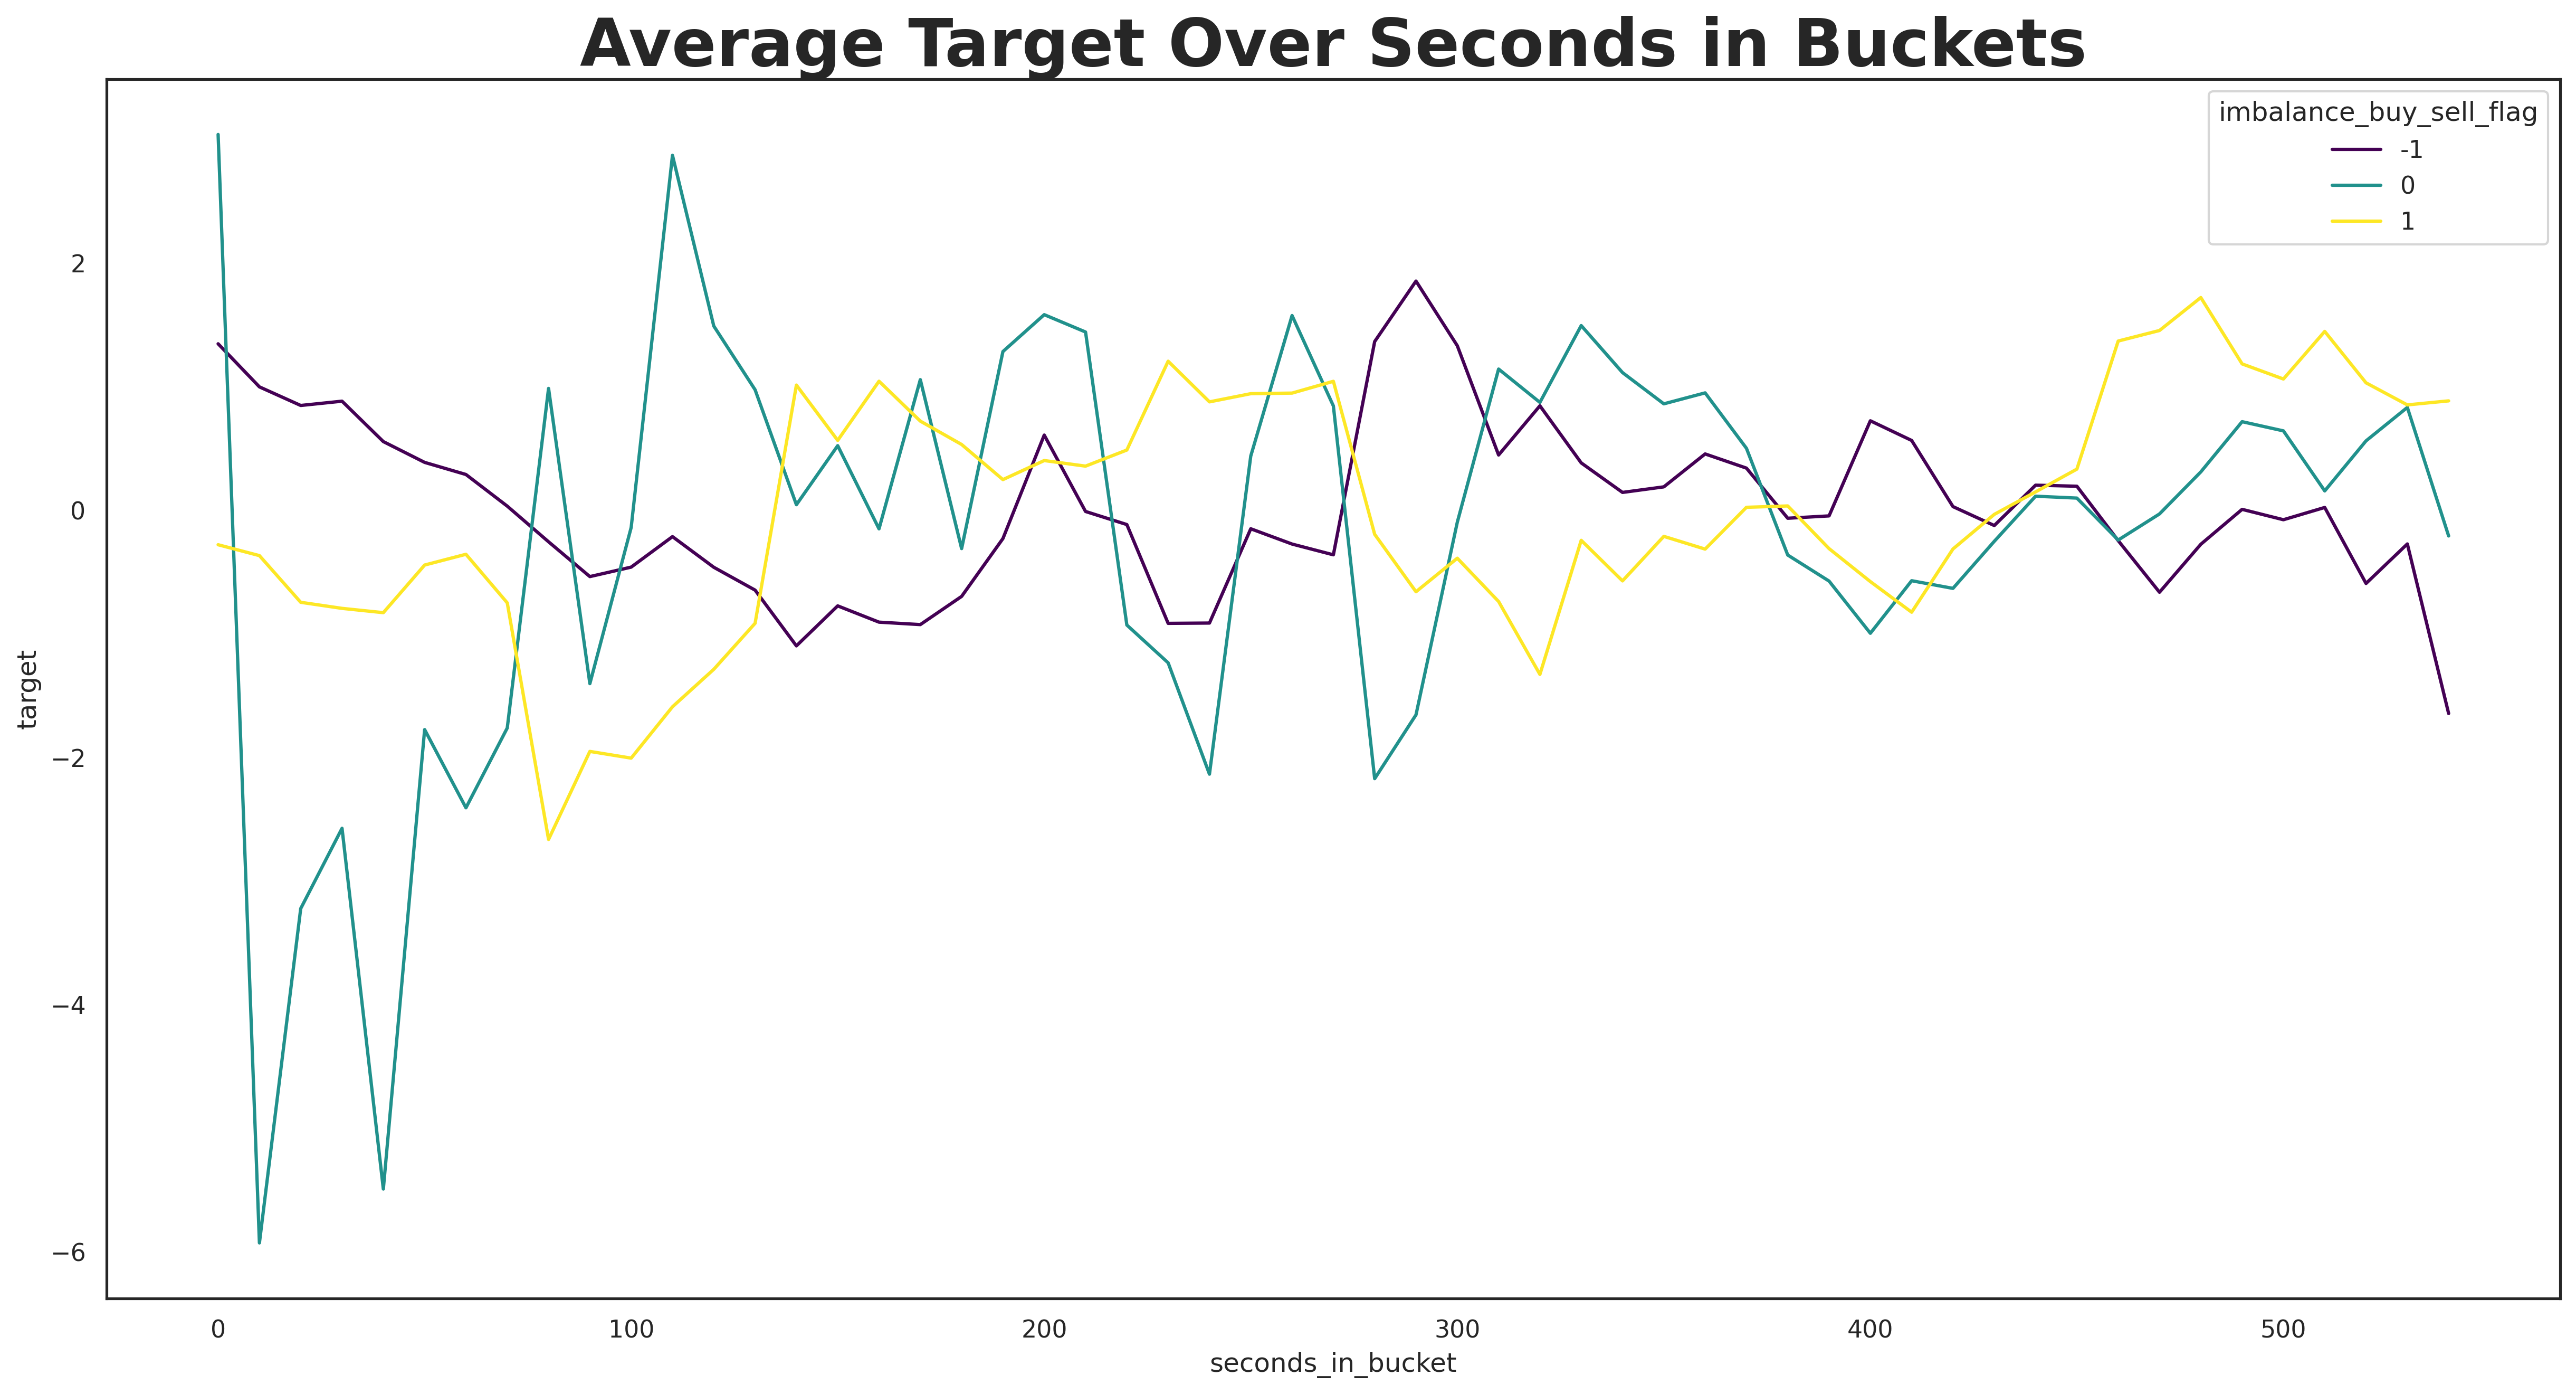

In [20]:
plt.figure(figsize = (20, 10), dpi = 300)

sns.lineplot(data = train, x = 'seconds_in_bucket', y = 'target', hue = 'imbalance_buy_sell_flag', errorbar = None, palette = 'viridis')

plt.title('Average Target Over Seconds in Buckets', weight = 'bold', fontsize = 30)
plt.show()

In [ ]:
train

In [21]:
print(len(train.loc[train['date_id']==0]))

55


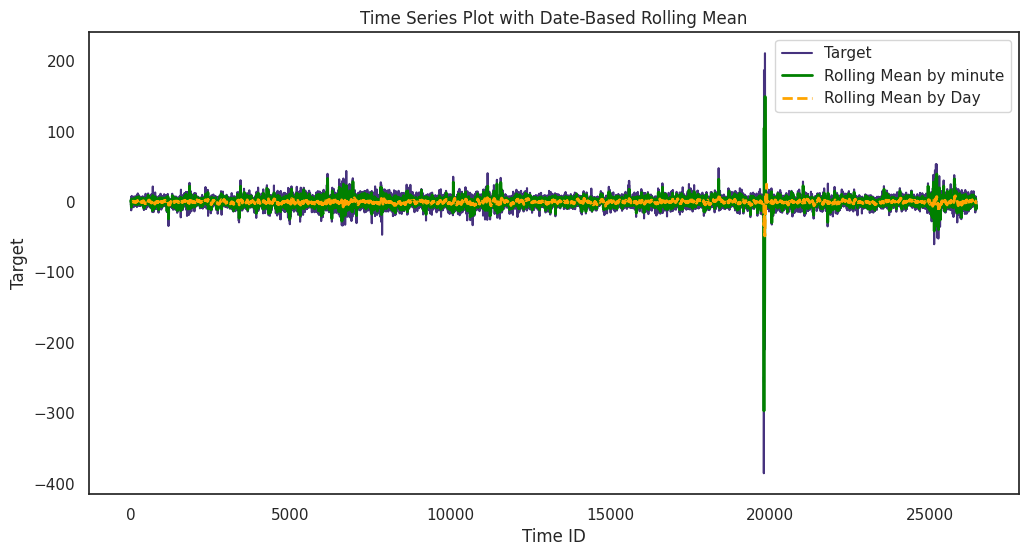

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Create a time series plot of the target variable
plt.figure(figsize=(12, 6))
sns.lineplot(data=train, x='time_id', y='target', label='Target')

# Calculate rolling statistics with rolling window size based on 'date_id' groups
rolling_window_size = 54
rolling_window = train.set_index('time_id').rolling(window=rolling_window_size)['target']

# Calculate rolling statistics with rolling window size based on each minute
rolling_window_size = 6
rolling_window_minute = train.set_index('time_id').rolling(window=rolling_window_size)['target']


# Plot the rolling mean
minute_rolling_mean = rolling_window_minute.mean()
plt.plot(minute_rolling_mean, label='Rolling Mean by minute', linestyle='-', linewidth=2, color='green')

# Plot the rolling mean
rolling_mean = rolling_window.mean()
plt.plot(rolling_mean, label='Rolling Mean by Day', linestyle='--', linewidth=2, color='orange')


plt.title('Time Series Plot with Date-Based Rolling Mean')
plt.xlabel('Time ID')
plt.ylabel('Target')
plt.legend()
plt.show()


In [28]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF test statistics', 'P-value', '# Lags', '# observations']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary.')
    else:
        print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary.')


adfuller_test(train['target'])

ADF test statistics : -26.529674422252697
P-value : 0.0
# Lags : 44
# observations : 26410
Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary.


In [26]:
from sklearn.preprocessing import MinMaxScaler

train = train.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train)

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np


## Exponential Smoothing



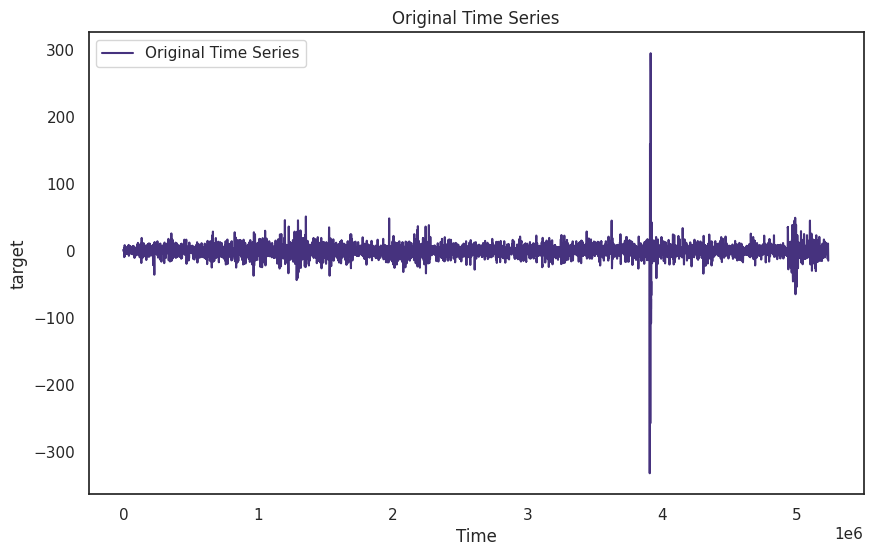

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
<ipython-input-34-da4407a0ff91>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Val

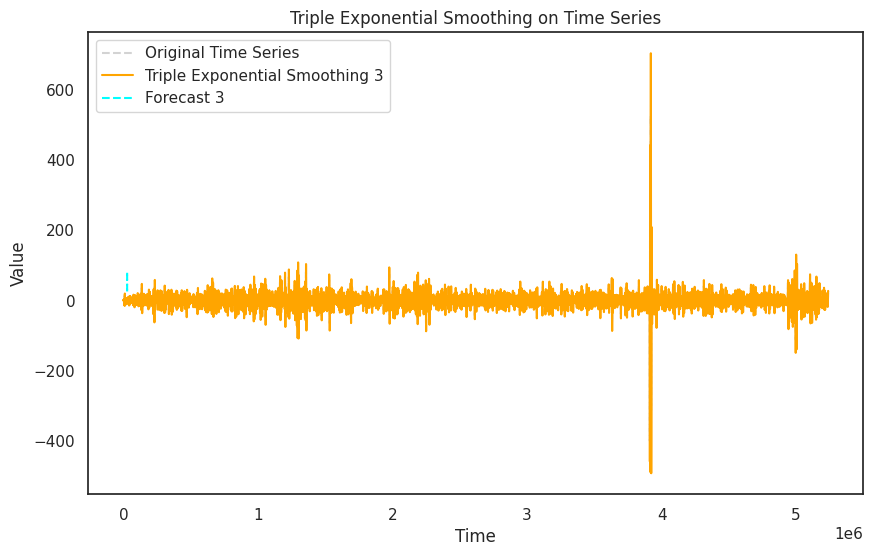

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Sample time series data (replace with your own data)
df = train

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['target'], label='Original Time Series')
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('target')
plt.legend()
plt.show()

# Triple Exponential Smoothing (Holt-Winters)
def triple_exponential_smoothing(series, alpha, beta, gamma, seasonal_periods, forecast_periods):
    model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=seasonal_periods)
    fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

    # Forecast
    forecast = fit.forecast(forecast_periods)

    return fit.fittedvalues, forecast

# Choose smoothing parameters
alpha = 0.2
beta = 0.2
gamma = 0.2
seasonal_periods = 7  # Assuming a weekly seasonality
forecast_periods = 30  # Number of periods to forecast

# Apply triple exponential smoothing
fitted_values_1, forecast_1 = triple_exponential_smoothing(df['target'], alpha, beta, gamma, seasonal_periods, forecast_periods)

# Update the original series with the first set of fitted values
df['target'] = fitted_values_1

# Apply triple exponential smoothing again
fitted_values_2, forecast_2 = triple_exponential_smoothing(df['target'], alpha, beta, gamma, seasonal_periods, forecast_periods)

# Update the original series with the second set of fitted values
df['target'] = fitted_values_2

# Apply triple exponential smoothing one more time
fitted_values_3, forecast_3 = triple_exponential_smoothing(df['target'], alpha, beta, gamma, seasonal_periods, forecast_periods)

# Plot the original, smoothed, and forecasted time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['target'], label='Original Time Series', linestyle='--', color='lightgray')
# plt.plot(df.index, fitted_values_1, label='Triple Exponential Smoothing 1', color='blue')
# plt.plot(df.index, fitted_values_2, label='Triple Exponential Smoothing 2', color='green')
plt.plot(df.index, fitted_values_3, label='Triple Exponential Smoothing 3', color='orange')
# plt.plot(forecast_1.index, forecast_1, label='Forecast 1', linestyle='--', color='blue')
# plt.plot(forecast_2.index, forecast_2, label='Forecast 2', linestyle='--', color='green')
plt.plot(forecast_3.index, forecast_3, label='Forecast 3', linestyle='--', color='cyan')
plt.title('Triple Exponential Smoothing on Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
train[0:54].plot(x='time_id', y='target', xlabel='Time in 10 seconds interval', ylabel='Target value of stock', figsize=(10,4), title='Plot of target value of Stock 17 for the first 1 minute')

In [ ]:
moving_average = train['target'].rolling(window=5).mean()

In [ ]:
moving_average[0:54].plot(figsize=(10,4))

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Sample time series data (replace with your own data)


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train['target'].values.reshape(-1, 1))

# Function to create sequences with a given sequence length
def create_sequences(data, sequence_length):
    sequences = []
    targets = []

    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length, 0])
        targets.append(data[i + sequence_length, 0])

    return np.array(sequences), np.array(targets)

# Set the sequence length to capture 9 minutes of historical data
sequence_length = 9

# Create sequences and targets
sequences, targets = create_sequences(scaled_data, sequence_length)

# Reshape for LSTM input (samples, time steps, features)
sequences = np.reshape(sequences, (sequences.shape[0], sequences.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequences.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(sequences, targets, epochs=20, batch_size=32)




In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [ ]:



# # Lists to store predictions for plotting
# all_predictions = []

# for (market_obs_df, news_obs_df, predictions_template_df) in iter_test:
#     # Process the test data (replace this with your specific data processing steps)
#     test_data = market_obs_df['time_id'].values.reshape(-1, 1)  # Replace 'feature_column' with the actual column used for prediction
#     test_data_scaled = scaler.transform(test_data)

#     # Create sequences for the test data
#     test_sequences, _ = create_sequences(test_data_scaled, sequence_length)

#     # Reshape for LSTM input (samples, time steps, features)
#     test_sequences = np.reshape(test_sequences, (test_sequences.shape[0], test_sequences.shape[1], 1))

#     # Make predictions for the test set
#     predicted_values = model.predict(test_sequences)

#     # Inverse transform to get the predicted values in the original scale
#     predicted_values = scaler.inverse_transform(predicted_values.reshape(-1, 1))

#     # Append predictions to the list
#     all_predictions.extend(predicted_values.flatten())

#     # Update the predictions_template_df with the forecasted values
#     predictions_template_df['target'] = predicted_values

#     # Submit the predictions
#     env.predict(predictions_template_df)

# # Finish the submission process
# env.write_submission_file()

# # Plotly interactive plot for the original time series and predictions
# fig = make_subplots(rows=1, cols=1, subplot_titles=['LSTM Time Series Forecasting'])

# # Add original time series
# fig.add_trace(go.Scatter(x=train.index, y=train['target'], mode='lines', name='Original Time Series', line=dict(color='lightgray', width=2)), row=1, col=1)

# # Add predicted values on the test set
# fig.add_trace(go.Scatter(x=np.arange(len(train), len(train) + len(all_predictions)), y=all_predictions, mode='lines', name='Predicted Values', line=dict(color='blue', width=2)), row=1, col=1)

# # Update layout
# fig.update_layout(title_text='LSTM Time Series Forecasting on Test Set', xaxis_title='Time', yaxis_title='Value')

# # Show the interactive plot
# fig.show()

In [35]:
import optiver2023
env = optiver2023.make_env()
iter_test = env.iter_test()
counter = 0
df_test, targets, pred = [],[],[]
for (test, revealed_targets, sample_prediction) in iter_test:

    df_test, targets, pred = test, revealed_targets, sample_prediction

    counter += 1

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
You must call `predict()` successfully before you can continue with `iter_test()`


TypeError: ignored

In [37]:
df_test = df_test[df_test['stock_id']==142]

In [40]:
revealed_targets = revealed_targets[revealed_targets['stock_id']==142]

In [42]:
sample_prediction

,row_id,target
0,478_0_0,0.0
1,478_0_1,0.0
2,478_0_2,0.0
3,478_0_3,0.0
4,478_0_4,0.0
...,...,...
195,478_0_195,0.0
196,478_0_196,0.0
197,478_0_197,0.0
198,478_0_198,0.0


## References:


1.   [LSTM for Time Series Prediction in PyTorch](https://machinelearningmastery.com/lstm-for-time-series-prediction-in-pytorch/)
2.   [Optiver 2023 Basic Submission Demo](https://www.kaggle.com/code/sohier/optiver-2023-basic-submission-demo)


